In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
!pip install pytesseract

In [ ]:
!pip install tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=4ded00595a8c36b7388559ede58db886876972e24d276a9a17f3e786e4bdc752
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (18.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

# Data Path

In [2]:
bbox_images_path = './drive/MyDrive/odometer_ocr/bbox_images'

# Functions

## Test tesseract Library

In [ ]:
import pytesseract

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [ ]:
filename = '31d589d1-d3d8-4aec-b3a7-22e6c7b1139d.jpeg'
image_path = os.path.join(bbox_images_path, filename)

In [ ]:
custom_config = r'--oem 3 --psm 6 outputbase digits'

In [ ]:
image = cv2.imread(image_path)

gray = get_grayscale(magnified_image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

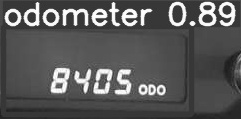

In [ ]:
cv2_imshow(gray)

In [ ]:
pytesseract.image_to_string(magnified_image, config=custom_config)

'0.95\n-\n.\n\x0c'

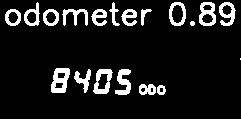

In [ ]:
cv2_imshow(thresh)

In [ ]:
pytesseract.image_to_string(thresh, config=custom_config)

'0.89\n\x0c'

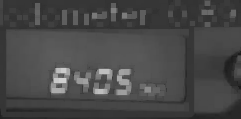

In [ ]:
cv2_imshow(opening)

In [ ]:
pytesseract.image_to_string(opening, config=custom_config)

'hth\n\x0c'

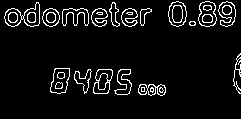

In [ ]:
cv2_imshow(canny)

In [ ]:
pytesseract.image_to_string(canny, config=custom_config)

'0.89\n\x0c'

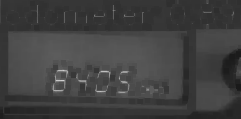

'foarte spies" aaah)\nLo\nr\n\n-\n\x0c'

In [ ]:
eroded = erode(gray)
cv2_imshow(eroded)
pytesseract.image_to_string(eroded, config=custom_config)

## Test EasyOCR Library

In [3]:
!pip install easyocr

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [11]:
import easyocr
import os
import csv


def extract_odometer(input_path):
    # English OCR reader
    reader = easyocr.Reader(['en'])

    # Read numbers from an image
    extracted_text = reader.readtext(input_path, allowlist='0123456789')
    extracted_texts_list = []
    for detection in extracted_text:
        extracted_texts_list.append(detection[1])
    return extracted_texts_list

def write_on_file(file_name, extracted_text_list, output_path):
    with open(output_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([file_name, extracted_text_list])

In [12]:
input_image_dir = './drive/MyDrive/odometer_ocr/yolov5/runs/detect/exp5/crops/odometer'
output_file = './drive/MyDrive/odometer_ocr/odometer_readings.csv'


with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_name', 'extracted_odometer'])


for filename in os.listdir(input_image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        input_image_path = os.path.join(input_image_dir, filename)
        extracted_odometer = extract_odometer(input_image_path)
        write_on_file(filename, extracted_odometer, output_file)